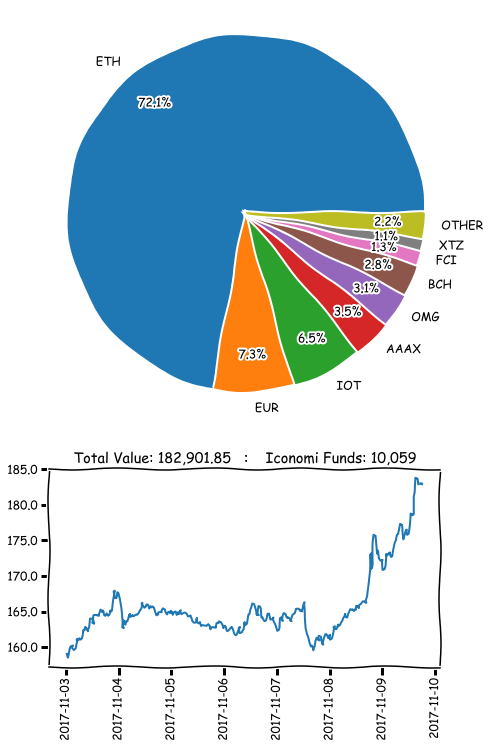

In [5]:
import os, json
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tck
import arrow

arrow_timestamps = []
totals = []
lookback_days = 7
chart_points = 300

#get appropriate number of points for chart for date range

files_to_process = [filename for filename in os.listdir('../data/archive/crypto_values') 
                    if filename.endswith("_crypto_values.json") 
                    and (arrow.now() - arrow.get(filename[0:10])).days < lookback_days]

files_to_process.sort()
files_to_process = files_to_process[::-int(round(len(files_to_process)/chart_points,0))]
files_to_process.sort()

for filename in files_to_process:
    data = json.loads(open('../data/archive/crypto_values/' + filename).read())
    data_date = arrow.get(data['timestamp'])
    arrow_timestamps.append(arrow.get(data['timestamp']))
    totals.append(float(data['data']['total_value'].replace(',', '')))


datetimes = [a.datetime for a in arrow_timestamps]
date_labels = [a.format('MM-DD HH:MM') for a in arrow_timestamps]

# Get PIE Data
crypto_data = json.loads(open('../data/crypto_values.json').read())
crypto_values = crypto_data['data']['values']

# sort the data by value - there must be a better way!
tuples = crypto_values.items()
sorted_data = sorted(zip([y for _, y in tuples], [x for x, _ in tuples]), reverse=True)

# Data to plot
labels = []
values = []
dust_value = 0.0
iconomi_coins = ['BLX', 'AAAX', 'CAR', 'FCI']
iconomi_value = 0.0

for value, label in sorted_data:

    try:
        iconomi_value += value if iconomi_coins.index(label) >= 0 else 0
    except:pass

    if value > 1000:
        labels.append(label)
        values.append(int(value))
    else:
        dust_value +=value
if dust_value > 1000:
    labels.append('OTHER')
    values.append(int(dust_value))

with plt.xkcd():
#if True: #below to retain indent
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(7, 12))
    gs = grd.GridSpec(2, 1, height_ratios=[2, 1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    #ax1.set_title('Total Value: ' + crypto_data['data']['total_value'])  # , bbox={'facecolor': '0.8', 'pad': 3})
    # plt.rcParams.update({'font.size': 14}) #adjust font size; not really needed

    ax1.pie(values,
            labels=labels,
            autopct='%1.1f%%',
            pctdistance=0.8,
            startangle=0)

    ax1.axis('equal')  # ensure pie is round

    ax2.plot(datetimes, totals)
    #ax2.set_title('Total Value Over Time (kGBP)')
    ax2.set_title('Total Value: {}   :    Iconomi Funds: {:,.0f}'.format(crypto_data['data']['total_value'], iconomi_value))
    ax2.get_yaxis().set_major_formatter(tck.FuncFormatter(lambda x, p: format(x / 1000, ',')))
    #ax2.set_xticklabels(date_labels, rotation=90)

    plt.xticks(rotation=90)
    plt.show()

    #plt.savefig('../data/crypto_pie.jpg', bbox_inches='tight')

    #short term hack so i can see it!
    #plt.savefig('../../../../Google Drive/crypto_pie.jpg', bbox_inches='tight')
    #plt.show()


In [7]:
int(len(files_to_process)/chart_points)

4

In [9]:
import plotly.tools as tl
import plotly.plotly as py
import plotly.graph_objs as go
import json
tl.set_credentials_file(username='chavwithtache', api_key='s0HozamCQiNDKPQYc7ss')

crypto_data = json.loads(open('../data/crypto_values.json').read())
crypto_values = crypto_data['values']
# Data to plot
labels = []
values = []
for label,value in crypto_values.items():
    if value > 1:
        labels.append(label)
        values.append(int(value))

trace = go.Pie(labels=labels, values=values)    
py.iplot([trace], filename='crypto_break_down')

PlotlyRequestError: Uh oh, an error occurred on the server. 

In [5]:
import plotly
plotly.tools.set_credentials_file(username='chavwithtache', api_key='s0HozamCQiNDKPQYc7ss')